<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook sandbox</p></tp>
            <tp><p style="font-size:150%;text-align:center">El mundo del Wumpus</p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---


# 1. Código inicial limpio

In [1]:
from logica import *
from entornos import *
from agentes import *

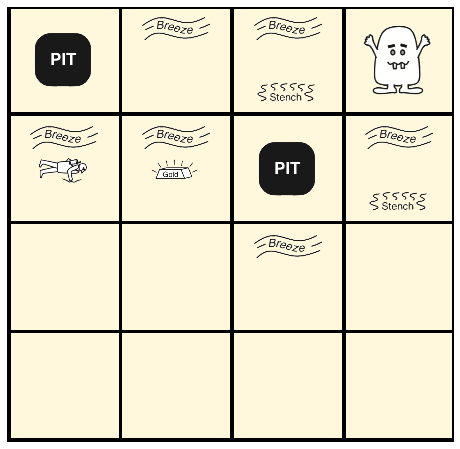

In [2]:
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
from agentes import *

W = Wumpus(wumpus=(3,3), oro=(1,2), pozos=[(0,3), (2,2)])
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()
c = agente.interp_percepto(mundo='wumpus')
agente.base.TELL(c)
W.pintar_todo()
plt.show()
sleep(.5) 

for i in range(5):
    a = agente.reaccionar()
    formula_accion = f'{a}_{agente.turno-1}'
    agente.base.TELL(formula_accion)
    W.transicion(a)
    if not W.juego_activo:
        clear_output(wait=True)
        W.pintar_todo()
        print(W.mensaje)
        break
    agente.estimar_estado(W)
    clear_output(wait=True)
    W.pintar_todo()
    plt.show()
    sleep(.5) 

---

# 2. Baseline: desempeño hasta ahora

In [3]:
def generate_random_wumpus():

    pozos = []
    pozo  = (choice([0,1,2,3]), choice([0,1,2,3]))   

    while len(pozos) < 2:
        if pozo != (0,0):
            pozos.append(pozo)
        pozo = (choice([0,1,2,3]), choice([0,1,2,3]))   

    wumpus = (choice([0,1,2,3]), choice([0,1,2,3]))

    while True:
        if wumpus != (0,0):
            break
        wumpus = (choice([0,1,2,3]), choice([0,1,2,3])) 

    oro   = ( choice([0,1,2,3]), choice([0,1,2,3]) )

    return Wumpus(wumpus = wumpus, oro = oro, pozos = pozos)
    

<AxesSubplot:>

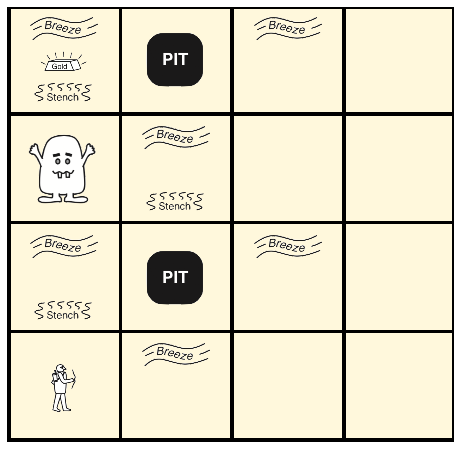

In [4]:
W = generate_random_wumpus()
agente = Agente()
formulas = agente.fluentes_mapa_mental()
formulas += agente.brisa_pozo()
formulas += agente.hedor_wumpus()
formulas += agente.casilla_segura()
formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
agente.base = LPQuery(formulas)
agente.perceptos = W.para_sentidos()

W.pintar_todo()


In [82]:
def play_game(game: Wumpus) -> int:
    
    """
        Juega el juego y retorna el puntaje.
    """
    
    agente = Agente()
    formulas = agente.fluentes_mapa_mental()
    formulas += agente.brisa_pozo()
    formulas += agente.hedor_wumpus()
    formulas += agente.casilla_segura()
    formulas += [f'en(0,0)_1', 'mirando_e_1', 'segura(0,0)']
    agente.base = LPQuery(formulas)
    agente.perceptos = game.para_sentidos()
    c = agente.interp_percepto(mundo='wumpus')
    agente.base.TELL(c)
    
    
    for i in range(100):
        a = agente.reaccionar()
        
        formula_accion = f'{a}_{agente.turno-1}'
        agente.base.TELL(formula_accion)
        
        game.transicion(a)
        
        if not game.juego_activo:
            
            test = game.oro == game.heroe
            return game.puntaje, test

            
        agente.estimar_estado(game)
        
    return None, None


¡Caso no contemplado!
¡Juego terminado!
Puntaje: 985
¡Caso no contemplado!
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 965
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 994
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 988
¡Juego terminado!
Puntaje: 970
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 989
¡Juego terminado!
Puntaje: 980
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 991
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 964
¡Juego terminado!
Puntaje: 990
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 975
¡Juego terminado!
Puntaje: 924
¡Juego terminado!
Puntaje: 988
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 993
¡Caso no contemplado!
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 992
¡Juego terminado!
Puntaje: 970
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 972
¡Caso no contemplado!
¡Caso no contemplado!
¡Caso no co

/home/dave/Documents/univ/6toSemestre/ia/taller/notebook6_2/entornos.py:214: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(figsize=(8, 8))


¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 957
¡Juego terminado!
Puntaje: 978
¡Juego terminado!
Puntaje: 993
¡Caso no contemplado!
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 998
¡Juego terminado!
Puntaje: 978
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 969
¡Juego terminado!
Puntaje: 989
¡Caso no contemplado!
¡Caso no contemplado!
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 998
¡Juego terminado!
Puntaje: 926
¡Juego terminado!
Puntaje: 970
¡Juego terminado!
Puntaje: 947
¡Juego terminado!
Puntaje: 990
¡Juego terminado!
Puntaje: 989
¡Caso no contemplado!
¡Caso no contemplado!
¡Juego terminado!
Puntaje: 974
¡Juego terminado!
Puntaje: 956
¡Caso no contemplado!
¡Caso no contemplado!


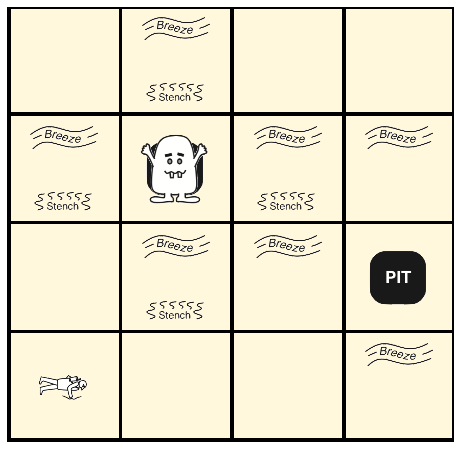

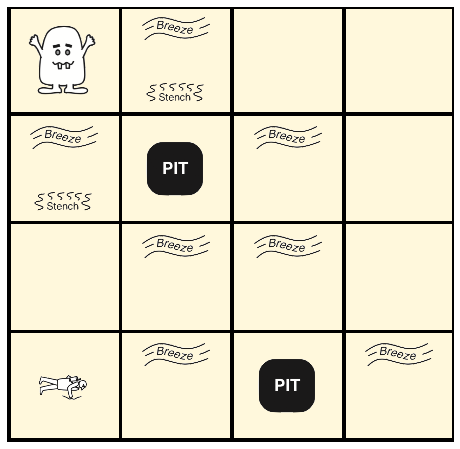

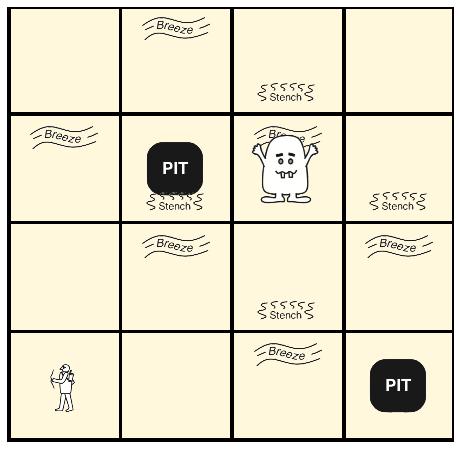

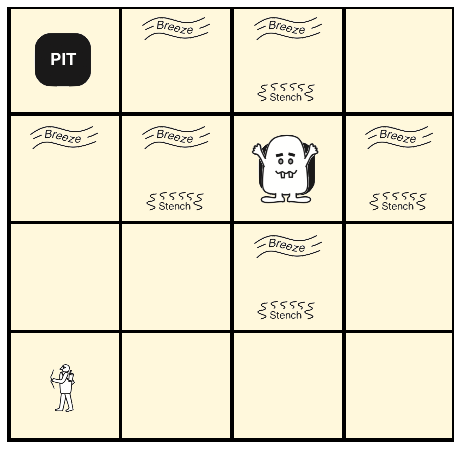

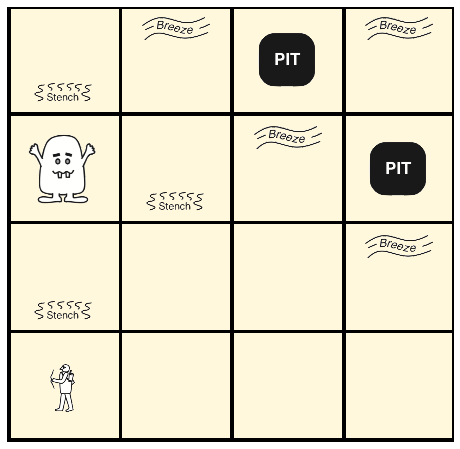

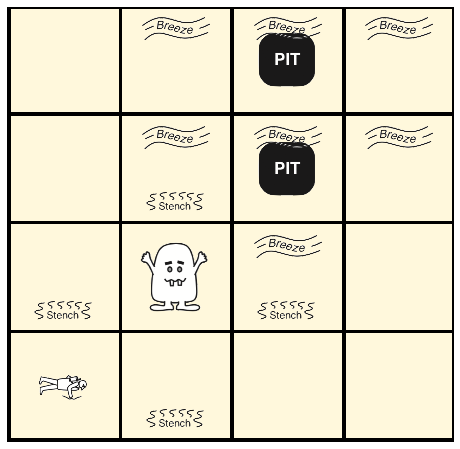

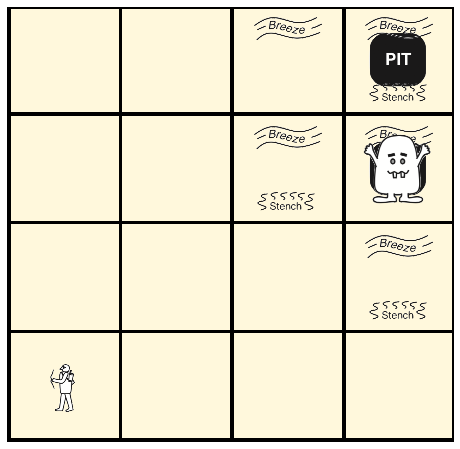

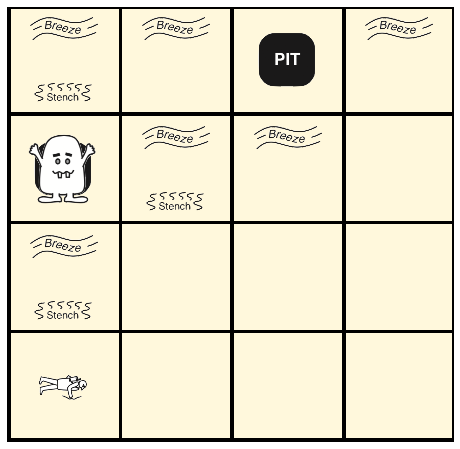

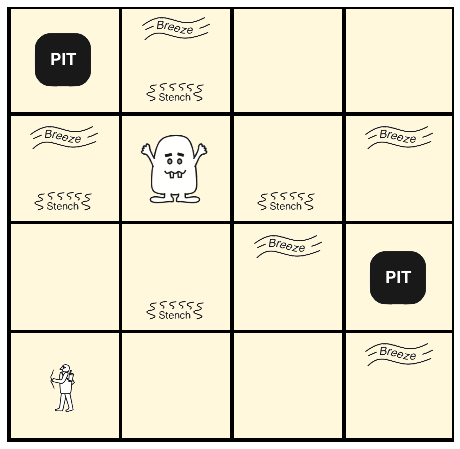

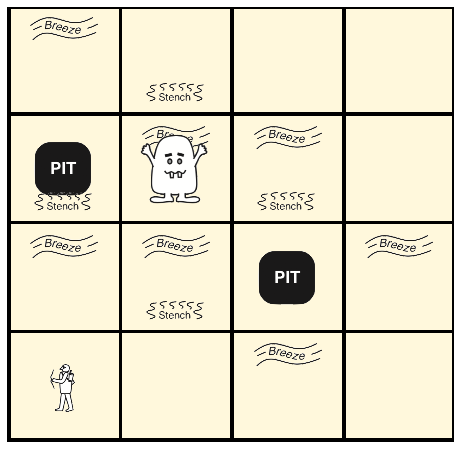

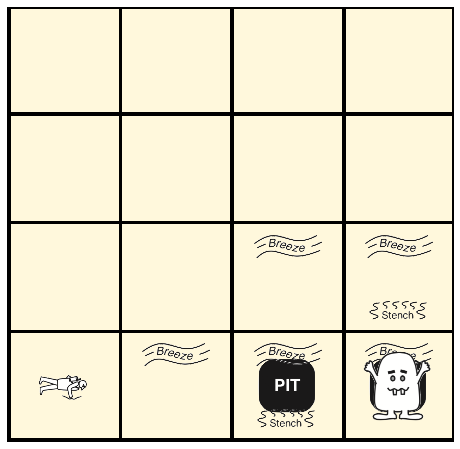

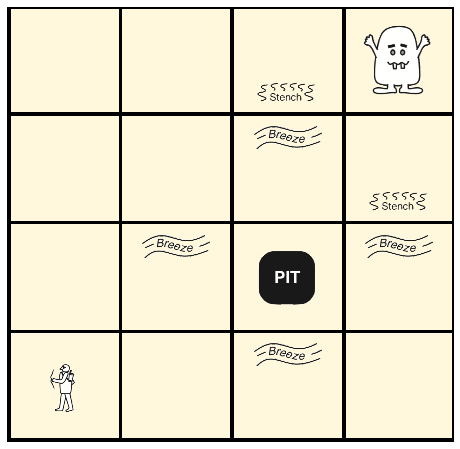

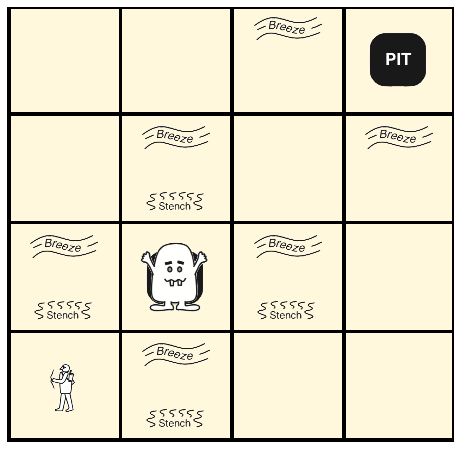

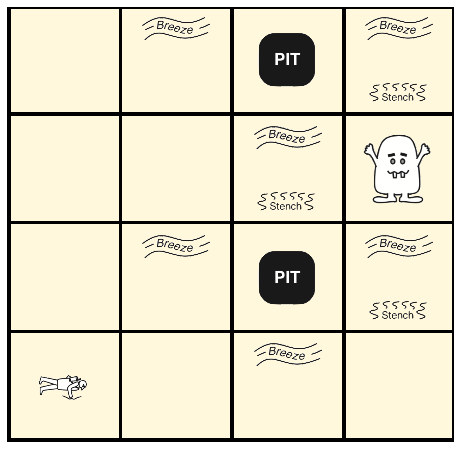

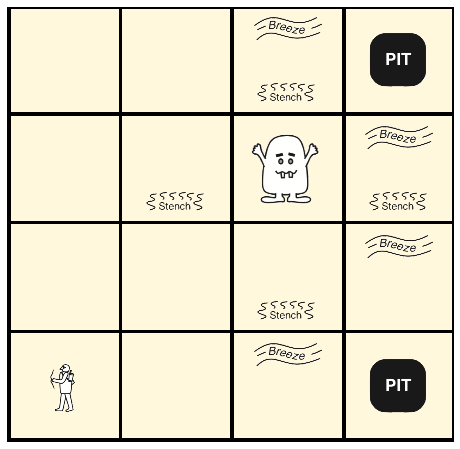

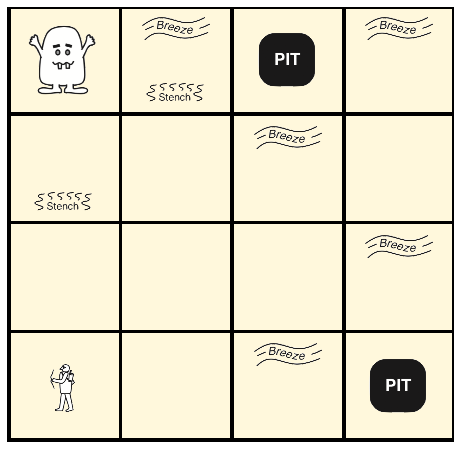

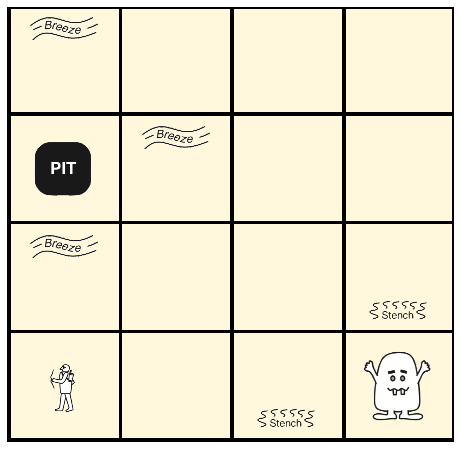

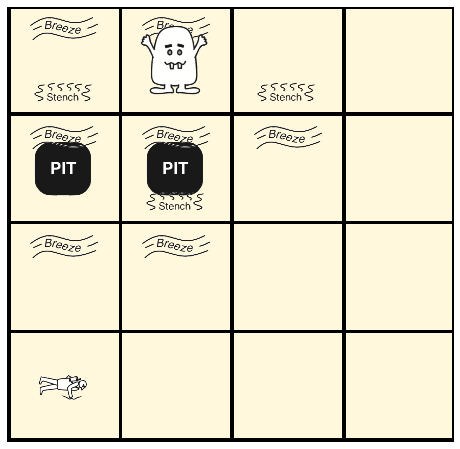

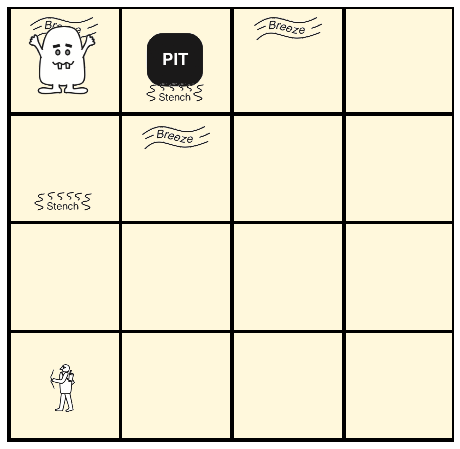

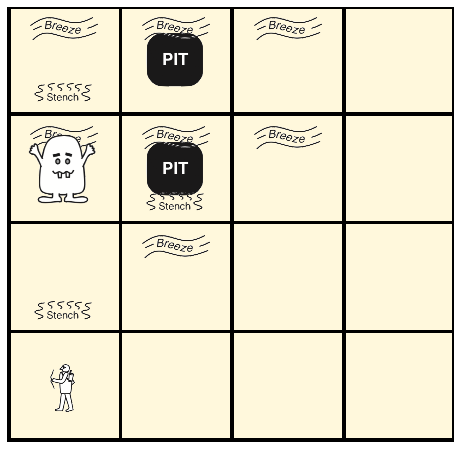

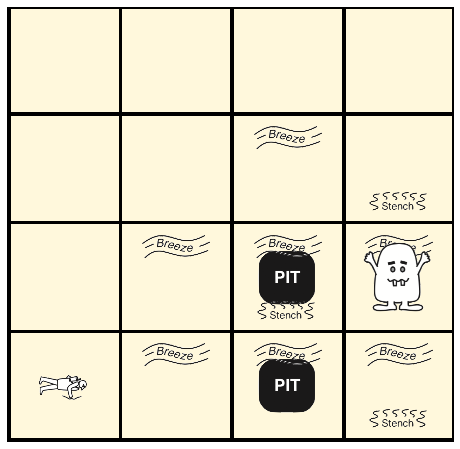

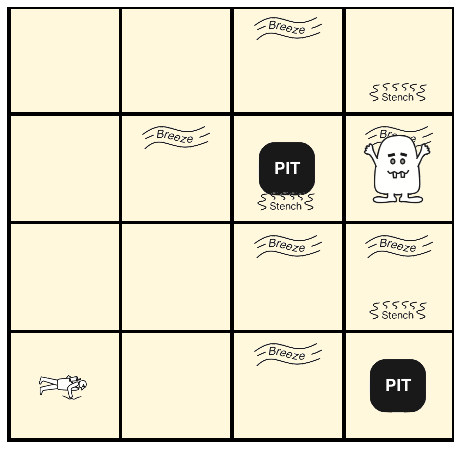

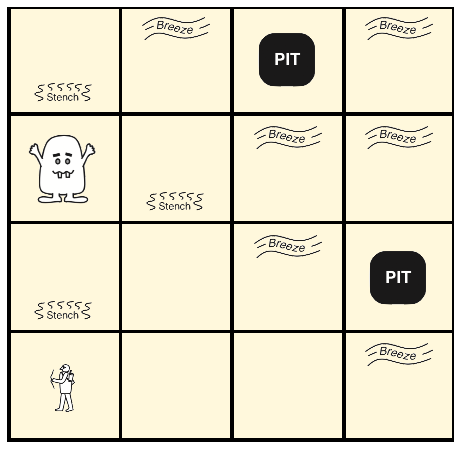

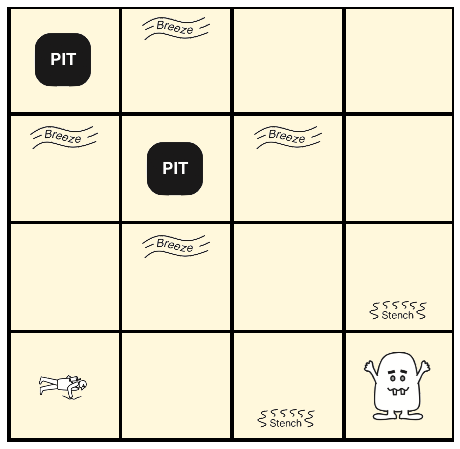

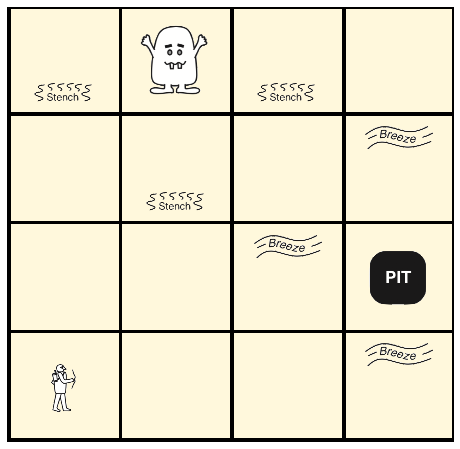

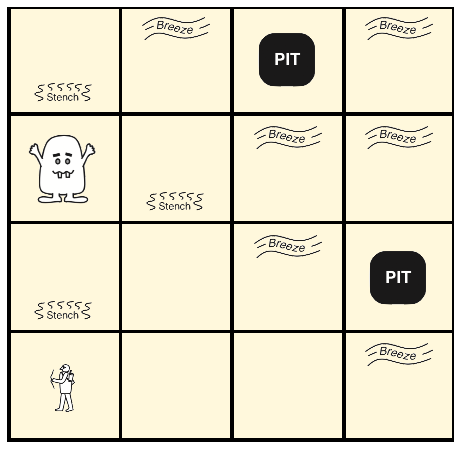

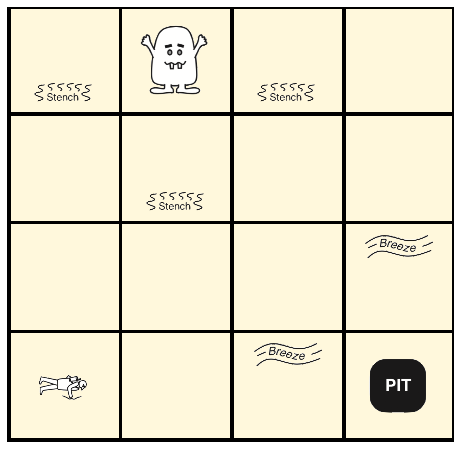

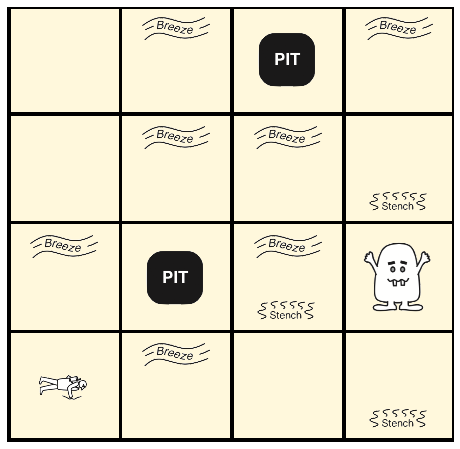

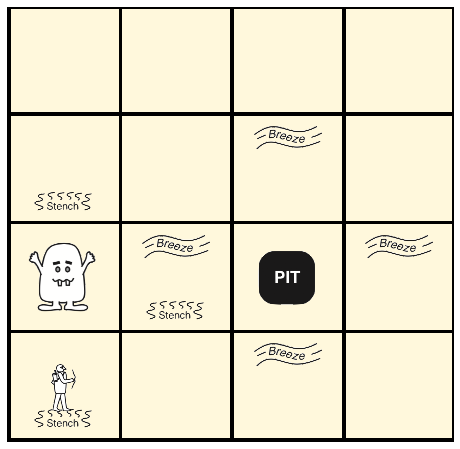

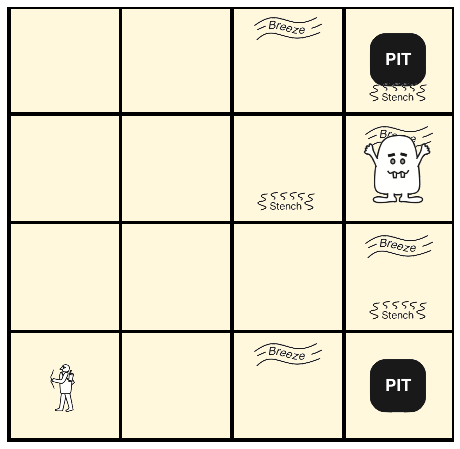

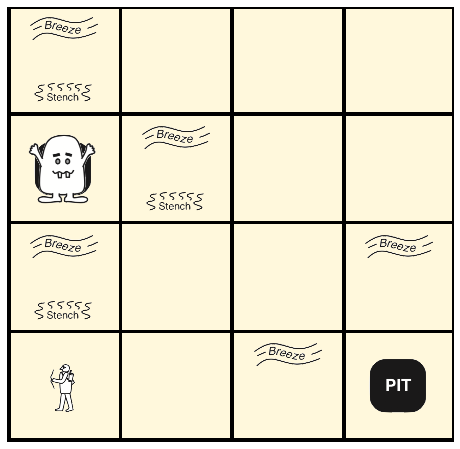

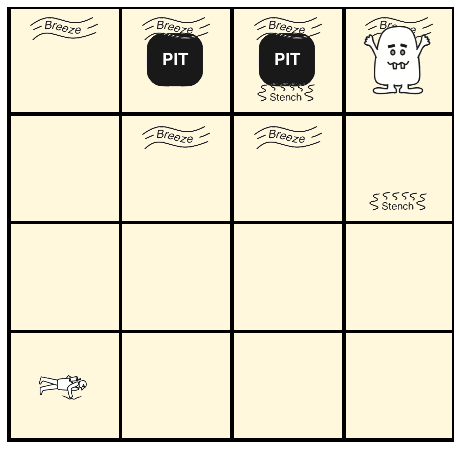

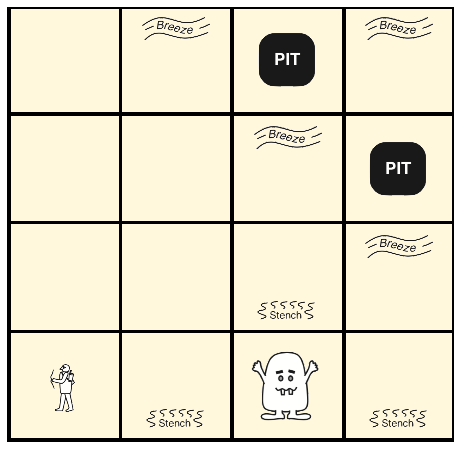

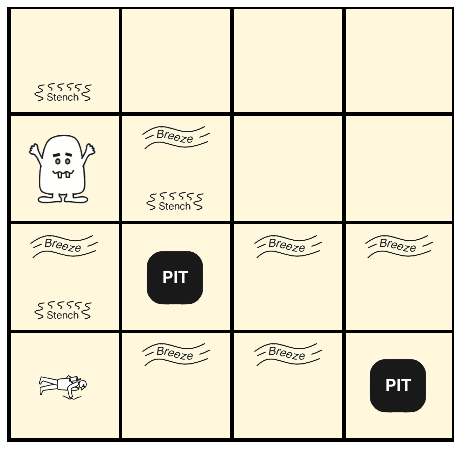

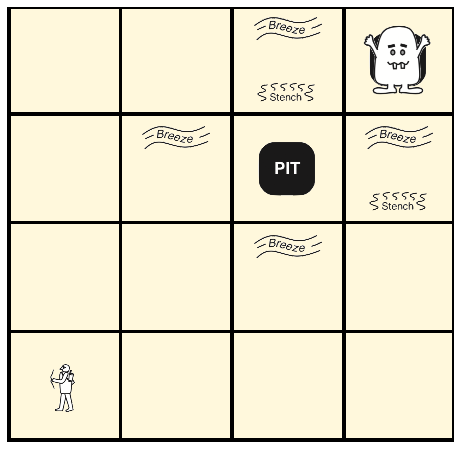

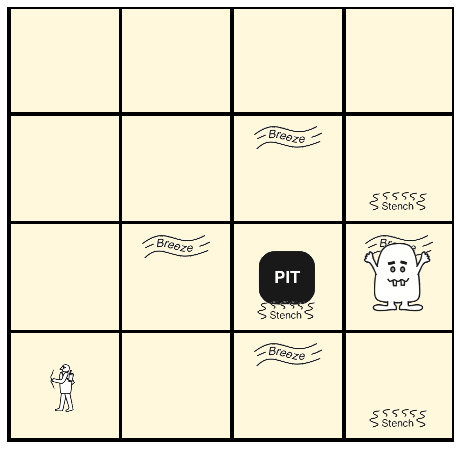

In [83]:
import pandas as pd
import seaborn as sns
from time import time

sample_size = 100
puntajes = []
exitos   = []
tiempos  = []


for i in range(sample_size):
    
    try:
        tiempo_ini = time()
        points, success = play_game(generate_random_wumpus())
        tiempo_fin = time()

        puntajes.append(points)
        exitos.append(success)
        tiempos.append(tiempo_fin - tiempo_ini)

    except:
        continue
            

In [84]:
from matplotlib import pyplot as plt
import numpy as np

exitos   = np.array(exitos)
puntajes = np.array(puntajes)
tiempos  = np.array(tiempos)

# los casos en los que no hay un exito como tal, se decide
# decir que falló
exitos[[exitos ==  np.array(None)]] = False

# cuando no hay puntaje se decide que el puntaje es -1000
# por que asumimos que falló
puntajes[[puntajes == np.array(None)]] = -1000

/tmp/ipykernel_11066/1605161865.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  exitos[[exitos ==  np.array(None)]] = False
/tmp/ipykernel_11066/1605161865.py:14: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  puntajes[[puntajes == np.array(None)]] = -1000


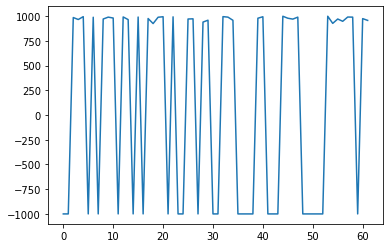

In [85]:
plt.plot(puntajes)

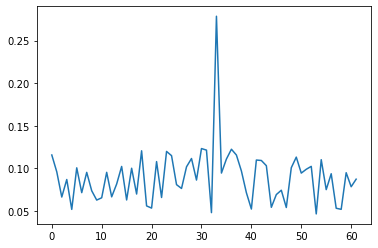

In [86]:
plt.plot(tiempos)

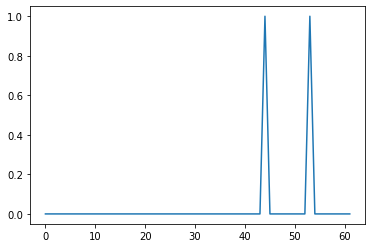

In [87]:
plt.plot(exitos)

In [88]:
print(f'puntajes \t\t\t= {np.mean(puntajes)}') 
print(f'tiempo medio de ejecusión \t= {np.mean(tiempos)} \tsegundos') 
print(f'porcentaje de exitos \t\t= {100*np.mean(exitos)} \t%') 

puntajes 			= 147.1290322580645
tiempo medio de ejecusión 	= 0.08965264212700629 	segundos
porcentaje de exitos 		= 3.225806451612903 	%


# 3. Mejora 1: Sólo hay un Wumpus

# 4. Desempeño mejora 1

# 5. Mejora 2: Si Wumpus ubicado, cazarlo

# 6. Desempeño mejora 2

---